In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [11]:
# To maintain Same result on each Run
np.random.seed(1)
from tensorflow import random
random.set_seed(1)

In [12]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

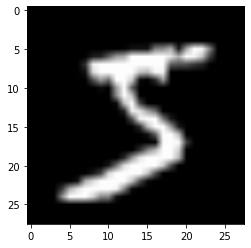

In [13]:
#Visualizaing an Image
plt.imshow(x_train[0], cmap = 'gray', interpolation = 'bilinear')

In [14]:
#Adding channel to xtrain and xtest set, here there is only 1 channel.
#Reshape format is (num of images, image_rows, image_col, no.of channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [15]:
#Binarizing ytrain, ytest 
from sklearn.preprocessing import LabelBinarizer
label_maker = LabelBinarizer()
y_train = label_maker.fit_transform(y_train)
y_test = label_maker.transform(y_test)

In [16]:
#cnn object
cnn = Sequential()

In [17]:
#Feature Extraction Layer
cnn.add(Convolution2D(filters=16, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())

#Classification or ANN Layer
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [18]:
'''
summary of the parameter to train
->No. of parameters of convolution layer is - (filter_height*filter_width*no._of_channels+1)*no._of_filters
->if u include one more convoltion  layer, no._of_channel of current convolution layer will become np._of_filter
  s of previous convoltution layer
->Param of dense_1 : 128(no. of neuron in current layer)*2704(previous layer output)+128(bias)
->Param of dense_2 : 10*128+10
'''
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


In [19]:
#This layer is applied at the end of each epoch
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#To stop the model when val_accuracy does not show change greater than .0001 uptill 3 epochs
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3, verbose=1, mode='auto', restore_best_weights=True)

In [21]:
#Fitting
model_info = cnn.fit(x_train, y_train,
                               batch_size=128, epochs=20,
                               verbose=1,
                               validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 21s 447us/step - loss: 1.0228 - accuracy: 0.9124 - val_loss: 0.1783 - val_accuracy: 0.9567
Epoch 2/20
48000/48000 [==============================] - 20s 408us/step - loss: 0.1076 - accuracy: 0.9716 - val_loss: 0.1228 - val_accuracy: 0.9695
Epoch 3/20
48000/48000 [==============================] - 23s 475us/step - loss: 0.0561 - accuracy: 0.9837 - val_loss: 0.1257 - val_accuracy: 0.9732
Epoch 4/20
48000/48000 [==============================] - 24s 493us/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.1132 - val_accuracy: 0.9752
Epoch 5/20
48000/48000 [==============================] - 23s 486us/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.1347 - val_accuracy: 0.9741
Epoch 6/20
48000/48000 [==============================] - 23s 479us/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.1171 - val_accuracy: 0.9787
Epoch 7/20
48000/48000 [==============================] 

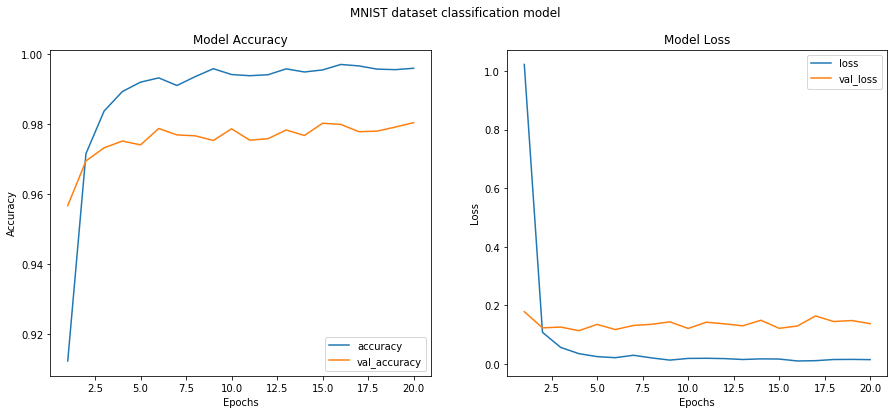

In [23]:
#plotting Model accuracy and Model LOss
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Model Accuracy')
plt.plot(np.arange(1, 21), model_info.history['accuracy'], label='Training Data')
plt.plot(np.arange(1, 21), model_info.history['val_accuracy'], label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

plt.subplot(1, 2, 2)
plt.title('Model Loss')
plt.plot(np.arange(1, 21), model_info.history['loss'], label='Training Data')
plt.plot(np.arange(1, 21), model_info.history['val_loss'], label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

plt.suptitle('MNIST dataset classification model')
plt.show()

In [25]:
#Predicting
y_pred = cnn.predict(x_test)
y_pred

array([[5.4822879e-23, 7.4492881e-21, 3.2816799e-13, ..., 1.0000000e+00,
        1.0180084e-24, 1.2800829e-16],
       [4.8000921e-13, 2.0292457e-08, 1.0000000e+00, ..., 1.2521240e-24,
        2.7921913e-19, 2.6440254e-28],
       [1.2729315e-13, 1.0000000e+00, 1.0679022e-16, ..., 2.7829142e-11,
        2.1737746e-10, 4.0074132e-14],
       ...,
       [3.6164356e-36, 3.6314448e-23, 7.9981270e-32, ..., 5.1199093e-15,
        5.7115044e-20, 4.2993225e-16],
       [7.8707315e-25, 3.1437315e-19, 5.4306043e-31, ..., 8.5877715e-26,
        3.1670064e-14, 1.8310730e-19],
       [2.1441972e-20, 6.4405582e-27, 1.8352614e-27, ..., 0.0000000e+00,
        1.1107236e-21, 1.2175897e-29]], dtype=float32)

In [26]:
#InverseTransform on Binary to integer
y_pred = label_maker.inverse_transform(y_pred)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

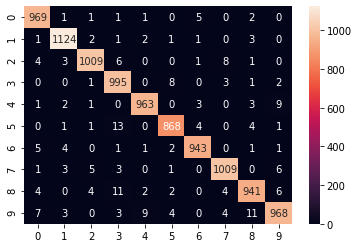

In [30]:
#Evaluating the Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(label_maker.inverse_transform(y_test), y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

In [32]:
from sklearn.metrics import classification_report
from pprint import pprint as pp
pp(classification_report(label_maker.inverse_transform(y_test), y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.98      0.99      0.98       980\n'
 '           1       0.99      0.99      0.99      1135\n'
 '           2       0.99      0.98      0.98      1032\n'
 '           3       0.96      0.99      0.97      1010\n'
 '           4       0.98      0.98      0.98       982\n'
 '           5       0.98      0.97      0.98       892\n'
 '           6       0.99      0.98      0.98       958\n'
 '           7       0.98      0.98      0.98      1028\n'
 '           8       0.97      0.97      0.97       974\n'
 '           9       0.97      0.96      0.97      1009\n'
 '\n'
 '    accuracy                           0.98     10000\n'
 '   macro avg       0.98      0.98      0.98     10000\n'
 'weighted avg       0.98      0.98      0.98     10000\n')
